# NARMA Dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle


In [35]:
plt.rcParams['font.size'] = 12


In [36]:
# load order parameter
save_array = np.load('../order_parameter/results/Order_parameter_64.npz')
X1 = save_array['X']
Y1 = save_array['Y']
MFv64 = save_array['Mfv64']

## N=64, order=3

In [37]:
order = 3
folder = f'narma{order}_results'
csv_path = f'{folder}/result.csv'

df = pd.read_csv(csv_path)
df = df[df['std']<=0.3]

# train_rmse and test_rmse outliers are excluded (outliers are determined using the interquartile range.)
Q1 = df['train_rmse'].quantile(0.25)
Q3 = df['train_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['train_rmse']) & (df['train_rmse'] < Q3 + 1.5*IQR)]

Q1 = df['test_rmse'].quantile(0.25)
Q3 = df['test_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['test_rmse']) & (df['test_rmse'] < Q3 + 1.5*IQR)]


mean_results = df.groupby(['d_bond', 'std', 'rho', 'parameter_size']).mean().reset_index()
mean_results['generalization'] = mean_results['test_rmse'] - mean_results['train_rmse']
mean_results

,d_bond,std,rho,parameter_size,seed,train_rmse,test_rmse,generalization
0,10,0.01,1.0,64,4.5,0.073126,0.066192,-0.006934
1,10,0.02,1.0,64,4.5,0.072711,0.066196,-0.006515
2,10,0.03,1.0,64,4.5,0.069507,0.063541,-0.005967
3,10,0.04,1.0,64,4.5,0.053497,0.047595,-0.005901
4,10,0.05,1.0,64,4.5,0.043272,0.039340,-0.003932
...,...,...,...,...,...,...,...,...
205,100,0.17,1.0,64,4.5,0.140554,0.132722,-0.007833
206,100,0.18,1.0,64,4.5,0.144261,0.137878,-0.006383
207,100,0.19,1.0,64,4.5,0.141165,0.137275,-0.003890
208,100,0.20,1.0,64,4.5,0.140774,0.131284,-0.009490


### 2d-map

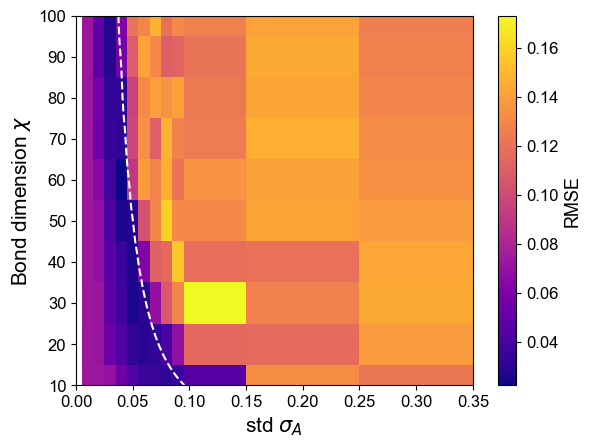

In [38]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/train_rmse.pdf', bbox_inches='tight')

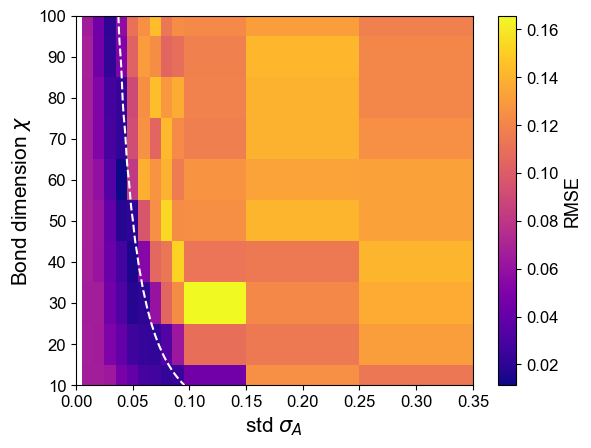

In [39]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/test_rmse.pdf', bbox_inches='tight')

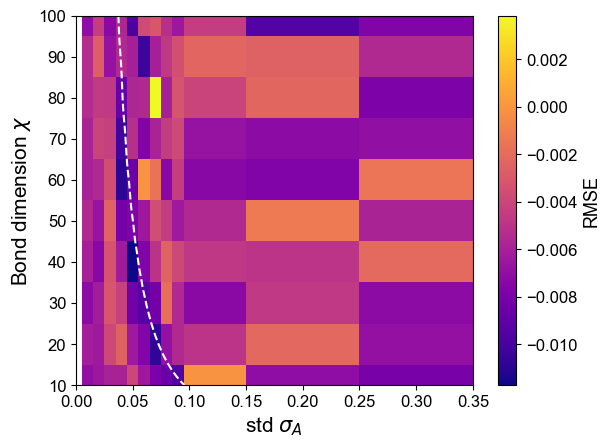

In [40]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['generalization']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/generalization_rmse.pdf', bbox_inches='tight')

In [41]:
seed = 0
d_bond = 80
std = 0.04
rho = 1.0
N = 64

predicict_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{N}_{seed}.npy'
predict = np.load(predicict_path)
df_pred = pd.DataFrame(predict)
df_pred.columns = ['Truth', 'Pred']
df_pred['Time step'] = df_pred.index
df_pred["Absolute error"] = np.abs(df_pred['Truth'] - df_pred['Pred'])
df_pred

,Truth,Pred,Time step,Absolute error
0,0.000000,0.352328,0,0.352328
1,0.000000,0.322816,1,0.322816
2,0.000000,0.292707,2,0.292707
3,0.212140,0.304398,3,0.092258
4,0.277264,0.293909,4,0.016645
...,...,...,...,...
995,0.187735,0.159180,995,0.028555
996,0.258200,0.238023,996,0.020177
997,0.442377,0.414432,997,0.027945
998,0.250952,0.226289,998,0.024663


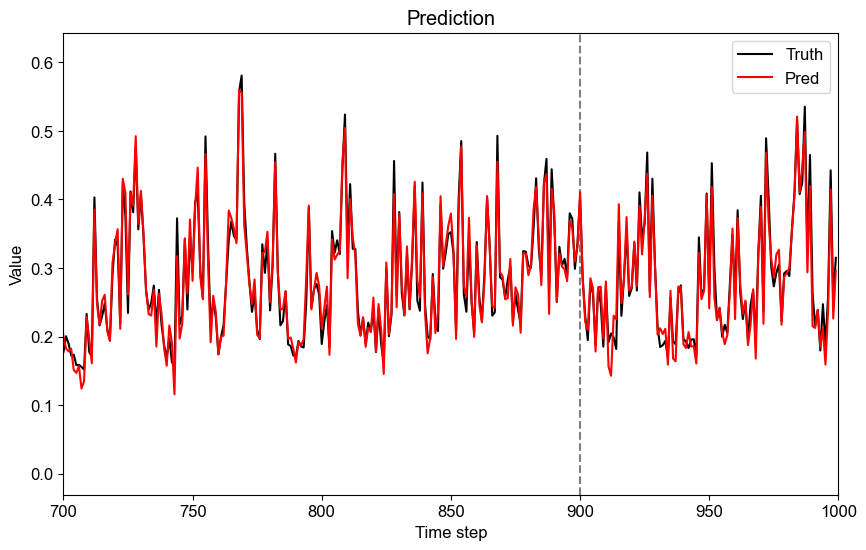

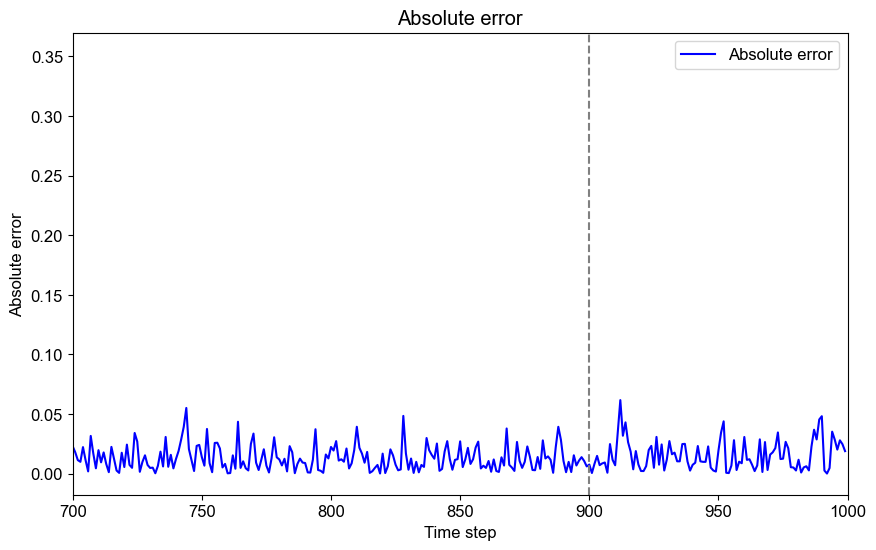

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Truth'], label='Truth', color='black')
# boundary between train data and test data
plt.axvline(x=900, color='gray', linestyle='--')
plt.plot(df_pred['Time step'], df_pred['Pred'], label='Pred', color='red')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Prediction')
plt.legend()
plt.savefig(f'{folder}/train_test_prediction.pdf')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Absolute error'], label='Absolute error', color='blue')
plt.axvline(x=900, color='gray', linestyle='--')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Absolute error')
plt.title('Absolute error')
plt.legend()
plt.savefig(f'{folder}/train_test_absolute_error.pdf')
plt.show()

## N=64, order=5

In [43]:
order = 5
folder = f'narma{order}_results'
csv_path = f'{folder}/result.csv'

df = pd.read_csv(csv_path)
df = df[df['std']<=0.3]

# train_rmse and test_rmse outliers are excluded (outliers are determined using the interquartile range.)
Q1 = df['train_rmse'].quantile(0.25)
Q3 = df['train_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['train_rmse']) & (df['train_rmse'] < Q3 + 1.5*IQR)]

Q1 = df['test_rmse'].quantile(0.25)
Q3 = df['test_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['test_rmse']) & (df['test_rmse'] < Q3 + 1.5*IQR)]


mean_results = df.groupby(['d_bond', 'std', 'rho', 'parameter_size']).mean().reset_index()
mean_results['generalization'] = mean_results['test_rmse'] - mean_results['train_rmse']
mean_results

,d_bond,std,rho,parameter_size,seed,train_rmse,test_rmse,generalization
0,10,0.01,1.0,64,4.5,0.077090,0.067504,-0.009586
1,10,0.02,1.0,64,4.5,0.077239,0.067385,-0.009854
2,10,0.03,1.0,64,4.5,0.077131,0.066785,-0.010346
3,10,0.04,1.0,64,4.5,0.077108,0.067168,-0.009940
4,10,0.05,1.0,64,4.5,0.077006,0.066407,-0.010599
...,...,...,...,...,...,...,...,...
205,100,0.17,1.0,64,4.5,0.147244,0.140665,-0.006578
206,100,0.18,1.0,64,4.5,0.149700,0.146315,-0.003385
207,100,0.19,1.0,64,4.5,0.148137,0.145091,-0.003046
208,100,0.20,1.0,64,4.5,0.147258,0.137877,-0.009381


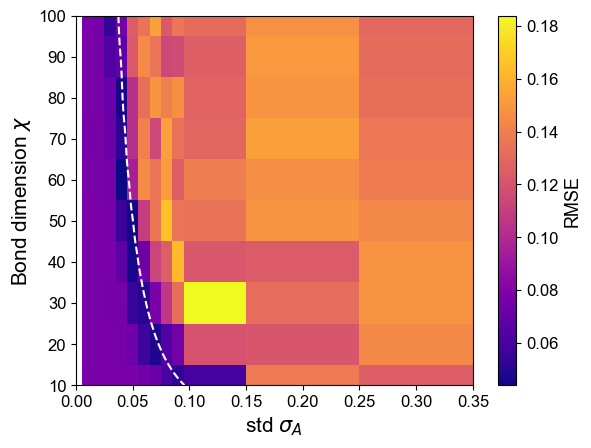

In [44]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])
plt.rcParams['font.size'] = 12


plt.savefig(f'narma{order}_results/train_rmse.pdf', bbox_inches='tight')

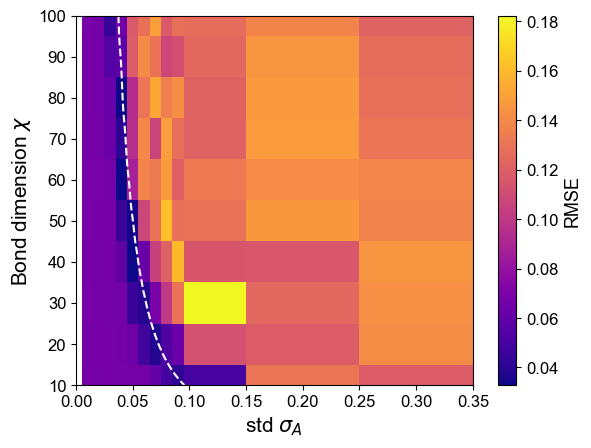

In [45]:

bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])


plt.savefig(f'narma{order}_results/test_rmse.pdf', bbox_inches='tight')
plt.savefig(f'narma{order}_results/figure_6_d.pdf', bbox_inches='tight')

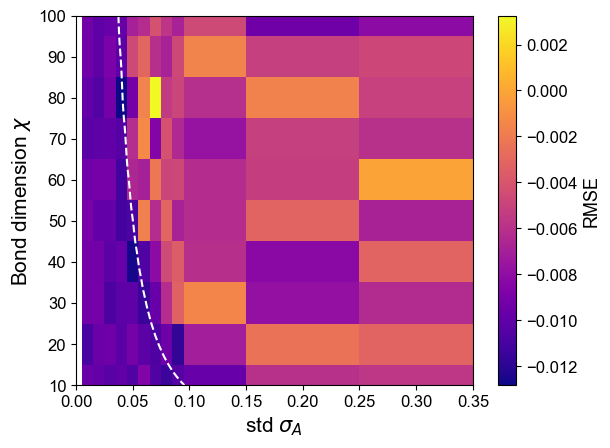

In [46]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['generalization']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')
plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/generalization_rmse.pdf', bbox_inches='tight')

In [47]:
seed = 0
d_bond = 80
std = 0.04
rho = 1.0
N = 64

predicict_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{N}_{seed}.npy'
predict = np.load(predicict_path)
df_pred = pd.DataFrame(predict)
df_pred.columns = ['Truth', 'Pred']
df_pred['Time step'] = df_pred.index
df_pred["Absolute error"] = np.abs(df_pred['Truth'] - df_pred['Pred'])
df_pred

,Truth,Pred,Time step,Absolute error
0,0.000000,0.330919,0,0.330919
1,0.000000,0.434775,1,0.434775
2,0.000000,0.397897,2,0.397897
3,0.000000,0.318423,3,0.318423
4,0.000000,0.272251,4,0.272251
...,...,...,...,...
995,0.246017,0.166847,995,0.079170
996,0.251837,0.206935,996,0.044903
997,0.271432,0.321087,997,0.049655
998,0.240565,0.261498,998,0.020933


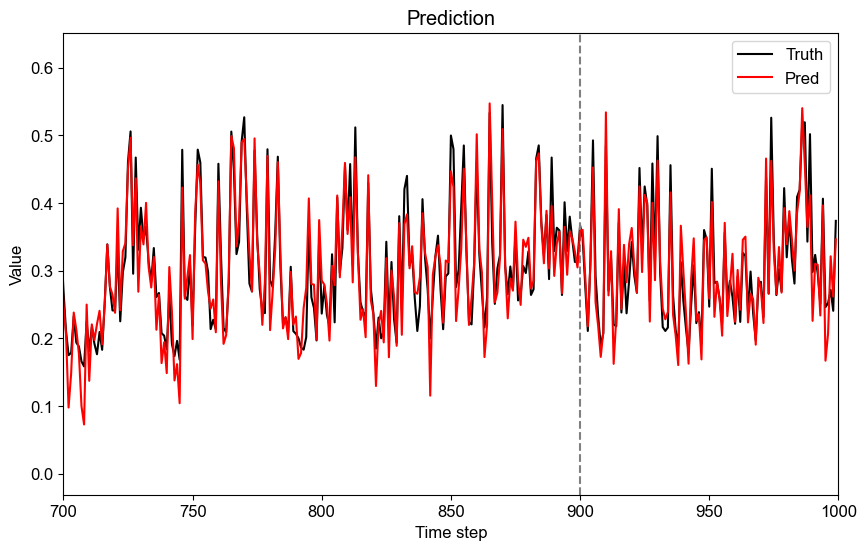

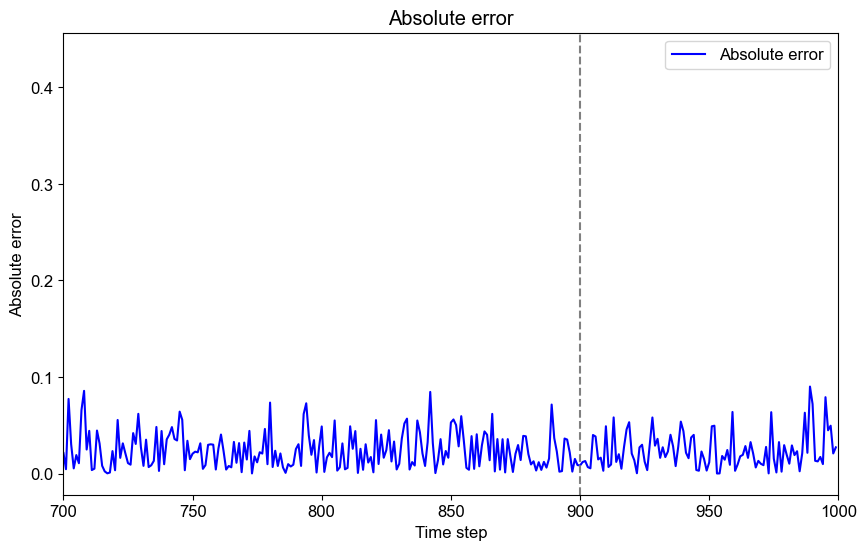

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Truth'], label='Truth', color='black')
# train_rmse and test_rmse outliers are excluded (outliers are determined using the interquartile range.)
plt.axvline(x=900, color='gray', linestyle='--')
plt.plot(df_pred['Time step'], df_pred['Pred'], label='Pred', color='red')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Prediction')
plt.legend()
plt.savefig(f'{folder}/train_test_prediction.pdf')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Absolute error'], label='Absolute error', color='blue')
plt.axvline(x=900, color='gray', linestyle='--')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Absolute error')
plt.title('Absolute error')
plt.legend()
plt.savefig(f'{folder}/train_test_absolute_error.pdf')
plt.show()

## N=64, order=10


In [49]:
order = 10
folder = f'narma{order}_results'
csv_path = f'{folder}/result.csv'

df = pd.read_csv(csv_path)
df = df[df['std']<=0.3]

# train_rmse and test_rmse outliers are excluded (outliers are determined using the interquartile range.)
Q1 = df['train_rmse'].quantile(0.25)
Q3 = df['train_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['train_rmse']) & (df['train_rmse'] < Q3 + 1.5*IQR)]

Q1 = df['test_rmse'].quantile(0.25)
Q3 = df['test_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['test_rmse']) & (df['test_rmse'] < Q3 + 1.5*IQR)]


mean_results = df.groupby(['d_bond', 'std', 'rho', 'parameter_size']).mean().reset_index()
mean_results['generalization'] = mean_results['test_rmse'] - mean_results['train_rmse']
mean_results

,d_bond,std,rho,parameter_size,seed,train_rmse,test_rmse,generalization
0,10,0.01,1.0,64,4.5,0.087861,0.077142,-0.010719
1,10,0.02,1.0,64,4.5,0.087343,0.077975,-0.009368
2,10,0.03,1.0,64,4.5,0.087215,0.077621,-0.009594
3,10,0.04,1.0,64,4.5,0.087723,0.077066,-0.010657
4,10,0.05,1.0,64,4.5,0.087211,0.076223,-0.010988
...,...,...,...,...,...,...,...,...
205,100,0.17,1.0,64,4.5,0.165558,0.161543,-0.004015
206,100,0.18,1.0,64,4.5,0.169406,0.173794,0.004387
207,100,0.19,1.0,64,4.5,0.166165,0.166789,0.000624
208,100,0.20,1.0,64,4.5,0.164990,0.162432,-0.002558


In [50]:
mean_results.iloc[mean_results['test_rmse'].idxmin()]

d_bond            80.000000
std                0.040000
rho                1.000000
parameter_size    64.000000
seed               4.500000
train_rmse         0.083742
test_rmse          0.071009
generalization    -0.012732
Name: 150, dtype: float64

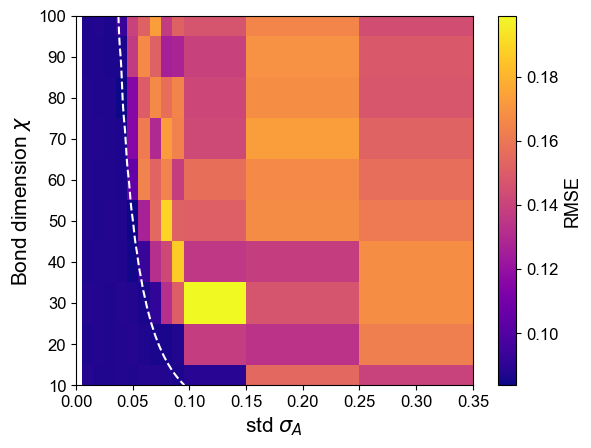

In [51]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/train_rmse.pdf', bbox_inches='tight')

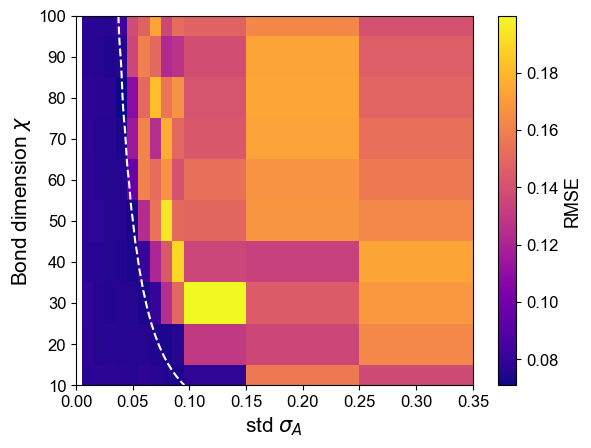

In [52]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/test_rmse.pdf', bbox_inches='tight')
plt.savefig(f'narma{order}_results/figure_6_b.pdf', bbox_inches='tight')

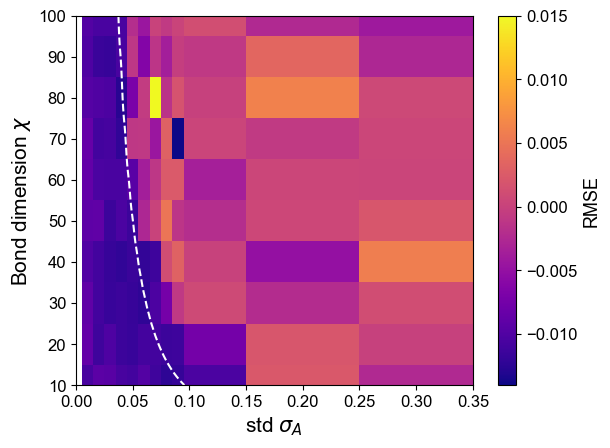

In [53]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['generalization']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'narma{order}_results/generalization_rmse.pdf', bbox_inches='tight')

In [54]:
seed = 0
d_bond = 80
std = 0.04
rho = 1.0
N = 64

predicict_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{N}_{seed}.npy'
predict = np.load(predicict_path)
df_pred = pd.DataFrame(predict)
df_pred.columns = ['Truth', 'Pred']
df_pred['Time step'] = df_pred.index
df_pred["Absolute error"] = np.abs(df_pred['Truth'] - df_pred['Pred'])
df_pred

,Truth,Pred,Time step,Absolute error
0,0.000000,0.343513,0,0.343513
1,0.000000,0.402104,1,0.402104
2,0.000000,0.406569,2,0.406569
3,0.000000,0.389930,3,0.389930
4,0.000000,0.343507,4,0.343507
...,...,...,...,...
995,0.380226,0.296021,995,0.084206
996,0.453679,0.317447,996,0.136232
997,0.611455,0.409381,997,0.202074
998,0.412487,0.366365,998,0.046122


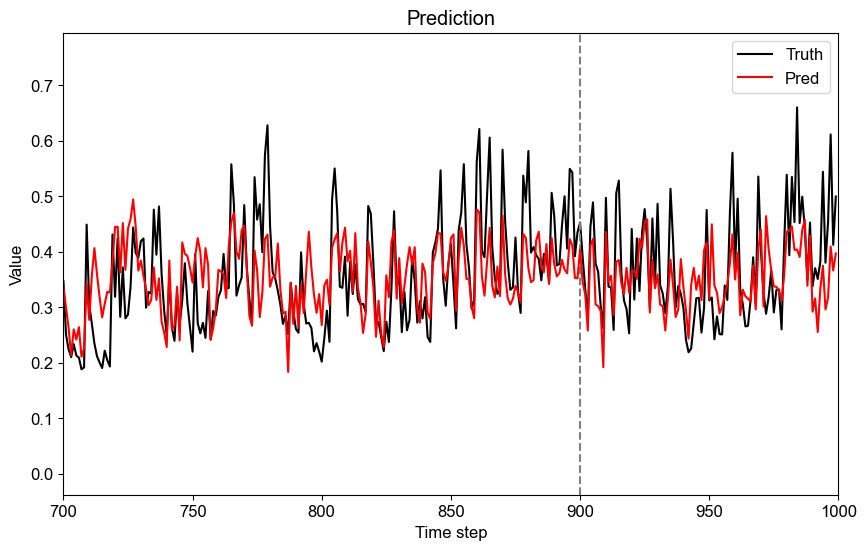

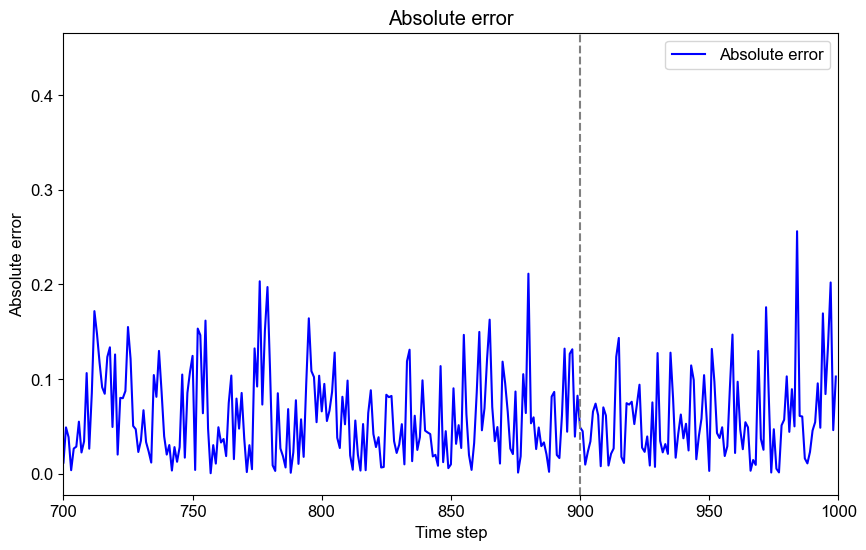

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Truth'], label='Truth', color='black')
# train_rmse and test_rmse outliers are excluded (outliers are determined using the interquartile range.)
plt.axvline(x=900, color='gray', linestyle='--')
plt.plot(df_pred['Time step'], df_pred['Pred'], label='Pred', color='red')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Prediction')
plt.legend()
plt.savefig(f'{folder}/train_test_prediction.pdf')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_pred['Time step'], df_pred['Absolute error'], label='Absolute error', color='blue')
plt.axvline(x=900, color='gray', linestyle='--')
plt.xlim(700, 1000)
plt.xlabel('Time step')
plt.ylabel('Absolute error')
plt.title('Absolute error')
plt.legend()
plt.savefig(f'{folder}/train_test_absolute_error.pdf')
plt.show()

## compare with ESN

In [56]:
def calculate_RMSE(true_data, predict_data):
    rmse = np.sqrt(np.mean((true_data - predict_data) ** 2))
    return rmse

In [57]:
order = 5
N_x = 64

In [58]:
with open(f'narma{order}_results/rmse_esn.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse'])
    for seed in range(10):
        results = np.load(f'narma{order}_results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        writer.writerow([seed, test_rmse])

In [59]:
with open(f'narma{order}_results/rmse_mps.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse'])
    for seed in range(10):
        results = np.load(f'narma{order}_results/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        writer.writerow([seed, test_rmse])

In [67]:
import pickle
with open(f'results/optuna/best_params_mps_{N_x}.pickle', 'rb') as file:
    result_dict = pickle.load(file)

result_dict

{'std': 0.05706355051230071, 'd_bond': 31}

### boxplot graph

In [60]:
df_esn = pd.read_csv(f"narma{order}_results/rmse_esn.csv")
df_mps = pd.read_csv(f"narma{order}_results/rmse_mps.csv")

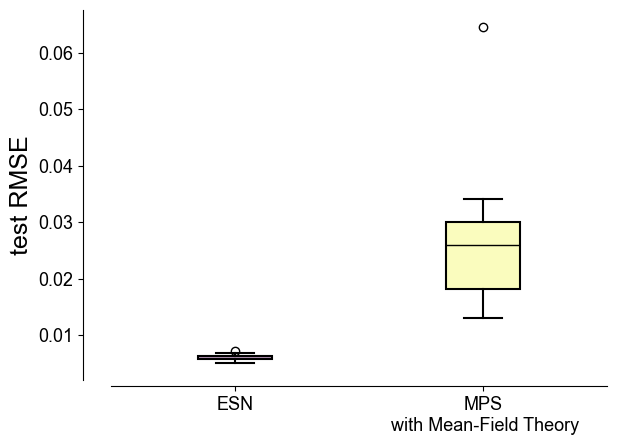

In [61]:
test_rmse_esn = df_esn['test_rmse']
test_rmse_mps = df_mps['test_rmse']
with open(f'results/optuna/best_params_mps_{N_x}.pickle', 'rb') as file:
    result_dict = pickle.load(file)

# std = round(result_dict['std'], 4)
# d_bond = result_dict['d_bond']

plt.figure()

boxplot_elements = plt.boxplot([test_rmse_esn, test_rmse_mps],
        labels=['ESN', 'MPS\n with Mean-Field Theory'],
        patch_artist=True,
        widths=0.3,
        boxprops={'linewidth': 1.5},
        medianprops={'color': 'black'},
        whiskerprops={'linewidth': 1.5},
        capprops={'linewidth': 1.5}
        )
colors = ['#9c179e4c', '#f1f5254c']
for patch, color in zip(boxplot_elements['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('test RMSE', fontsize=18)


plt.tick_params(labelsize=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig(f'narma{order}_results/boxplot-rmse.pdf', bbox_inches='tight')
plt.savefig(f'narma{order}_results/figure_supp_9_2_a.pdf', bbox_inches='tight')

### test RMSE vs delay

### non-parametric test

In [62]:
df_esn = pd.read_csv(f'narma{order}_results/rmse_esn.csv')
df_mps = pd.read_csv(f'narma{order}_results/rmse_mps.csv')
test_rmse_esn = df_esn['test_rmse']
test_rmse_mps = df_mps['test_rmse']

print("order: ", order)
print("ranksum-test")

from scipy.stats import ranksums
stat, p_value = ranksums(test_rmse_esn, test_rmse_mps, alternative='less')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

import numpy as np
from scipy.stats import permutation_test

print("permutation-test")

def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((test_rmse_esn, test_rmse_mps), statistic, alternative='less', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


order:  5
ranksum-test
Observed statistic: -3.779644730092272
P-value: 7.852614211537559e-05
permutation-test
Observed statistic: -0.02158090020410565
P-value: 9.999000099990002e-05
